In this notebook i will find the best parameters for apple

Code to import data

In [2]:
import yfinance as yf
import pandas as pd
import numpy as np


def get_stock_data(symbol):
    history_prices = get_history_prices(symbol)
    income_statement = get_income_statement(symbol)
    df_stock_full_info_with_nan = merge(history_prices, income_statement)
    df_stock_full_info = delete_Nan_in_dataframe(
        df_stock_full_info_with_nan
    )
    return df_stock_full_info


def get_history_prices(symbol):
    company = yf.Ticker(symbol)
    history_prices = company.history(period="max")
    return history_prices


def get_income_statement(symbol):
    company = yf.Ticker(symbol)
    quarterly_financials = company.quarterly_financials
    return quarterly_financials


def merge(df_stockdata, income_statement):
    df_stockdata["Quarter"] = pd.PeriodIndex(df_stockdata.index, freq="Q")
    income_statement = income_statement.T
    income_statement["Quarter"] = pd.PeriodIndex(income_statement.index, freq="Q")
    income_statement["Quarter"] = income_statement["Quarter"] + 1
    date_index = df_stockdata.index
    df_stockdata = df_stockdata.merge(income_statement, on="Quarter", how="left")
    df_stockdata.index = date_index
    df_stockdata.drop(columns=['Quarter'], inplace=True)
    return df_stockdata


def delete_Nan_in_dataframe(df_stockdata):
    df_stockdata = df_stockdata.dropna(axis=1, how="all")
    df_stockdata = df_stockdata.fillna(0)
    columns_to_drop = df_stockdata.columns[(df_stockdata == 0).all()]
    df_stockdata = df_stockdata.drop(columns=columns_to_drop)
    return df_stockdata





In [3]:
df=get_stock_data("AAPL")
df

C:\Users\konra\AppData\Local\Temp\ipykernel_19880\1239936064.py:42: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_stockdata = df_stockdata.fillna(0)


,Open,High,Low,Close,Volume,Dividends,Stock Splits,Tax Rate For Calcs,Normalized EBITDA,Net Income From Continuing Operation Net Minority Interest,...,Interest Expense Non Operating,Interest Income Non Operating,Operating Income,Operating Expense,Research And Development,Selling General And Administration,Gross Profit,Cost Of Revenue,Total Revenue,Operating Revenue
Date,,,,,,,,,,,,,,,,,,,,,
1980-12-12 00:00:00-05:00,0.098726,0.099155,0.098726,0.098726,469033600,0.0,0.0,0.00,0.000000e+00,0.000000e+00,...,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
1980-12-15 00:00:00-05:00,0.094005,0.094005,0.093575,0.093575,175884800,0.0,0.0,0.00,0.000000e+00,0.000000e+00,...,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
1980-12-16 00:00:00-05:00,0.087136,0.087136,0.086707,0.086707,105728000,0.0,0.0,0.00,0.000000e+00,0.000000e+00,...,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
1980-12-17 00:00:00-05:00,0.088853,0.089282,0.088853,0.088853,86441600,0.0,0.0,0.00,0.000000e+00,0.000000e+00,...,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
1980-12-18 00:00:00-05:00,0.091429,0.091858,0.091429,0.091429,73449600,0.0,0.0,0.00,0.000000e+00,0.000000e+00,...,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-03-13 00:00:00-04:00,215.949997,216.839996,208.419998,209.679993,61368300,0.0,0.0,0.21,4.591200e+10,3.633000e+10,...,0.0,0.0,4.283200e+10,1.544300e+10,8.268000e+09,7.175000e+09,5.827500e+10,6.602500e+10,1.243000e+11,1.243000e+11
2025-03-14 00:00:00-04:00,211.250000,213.949997,209.580002,213.490005,60107600,0.0,0.0,0.21,4.591200e+10,3.633000e+10,...,0.0,0.0,4.283200e+10,1.544300e+10,8.268000e+09,7.175000e+09,5.827500e+10,6.602500e+10,1.243000e+11,1.243000e+11
2025-03-17 00:00:00-04:00,213.309998,215.220001,209.970001,214.000000,48073400,0.0,0.0,0.21,4.591200e+10,3.633000e+10,...,0.0,0.0,4.283200e+10,1.544300e+10,8.268000e+09,7.175000e+09,5.827500e+10,6.602500e+10,1.243000e+11,1.243000e+11


Now i will consider which columns are usesless, but first let's list columns

In [4]:

df.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Dividends', 'Stock Splits',
       'Tax Rate For Calcs', 'Normalized EBITDA',
       'Net Income From Continuing Operation Net Minority Interest',
       'Reconciled Depreciation', 'Reconciled Cost Of Revenue', 'EBITDA',
       'EBIT', 'Net Interest Income', 'Interest Expense', 'Interest Income',
       'Normalized Income',
       'Net Income From Continuing And Discontinued Operation',
       'Total Expenses', 'Total Operating Income As Reported',
       'Diluted Average Shares', 'Basic Average Shares', 'Diluted EPS',
       'Basic EPS', 'Diluted NI Availto Com Stockholders',
       'Net Income Common Stockholders', 'Net Income',
       'Net Income Including Noncontrolling Interests',
       'Net Income Continuous Operations', 'Tax Provision', 'Pretax Income',
       'Other Income Expense', 'Other Non Operating Income Expenses',
       'Net Non Operating Interest Income Expense',
       'Interest Expense Non Operating', 'Interest Incom

It is important that we need to work with numeric data so we need to change types of columns

In [5]:

df = df.astype(float)
df.dtypes

Open                                                          float64
High                                                          float64
Low                                                           float64
Close                                                         float64
Volume                                                        float64
Dividends                                                     float64
Stock Splits                                                  float64
Tax Rate For Calcs                                            float64
Normalized EBITDA                                             float64
Net Income From Continuing Operation Net Minority Interest    float64
Reconciled Depreciation                                       float64
Reconciled Cost Of Revenue                                    float64
EBITDA                                                        float64
EBIT                                                          float64
Net Interest Income 

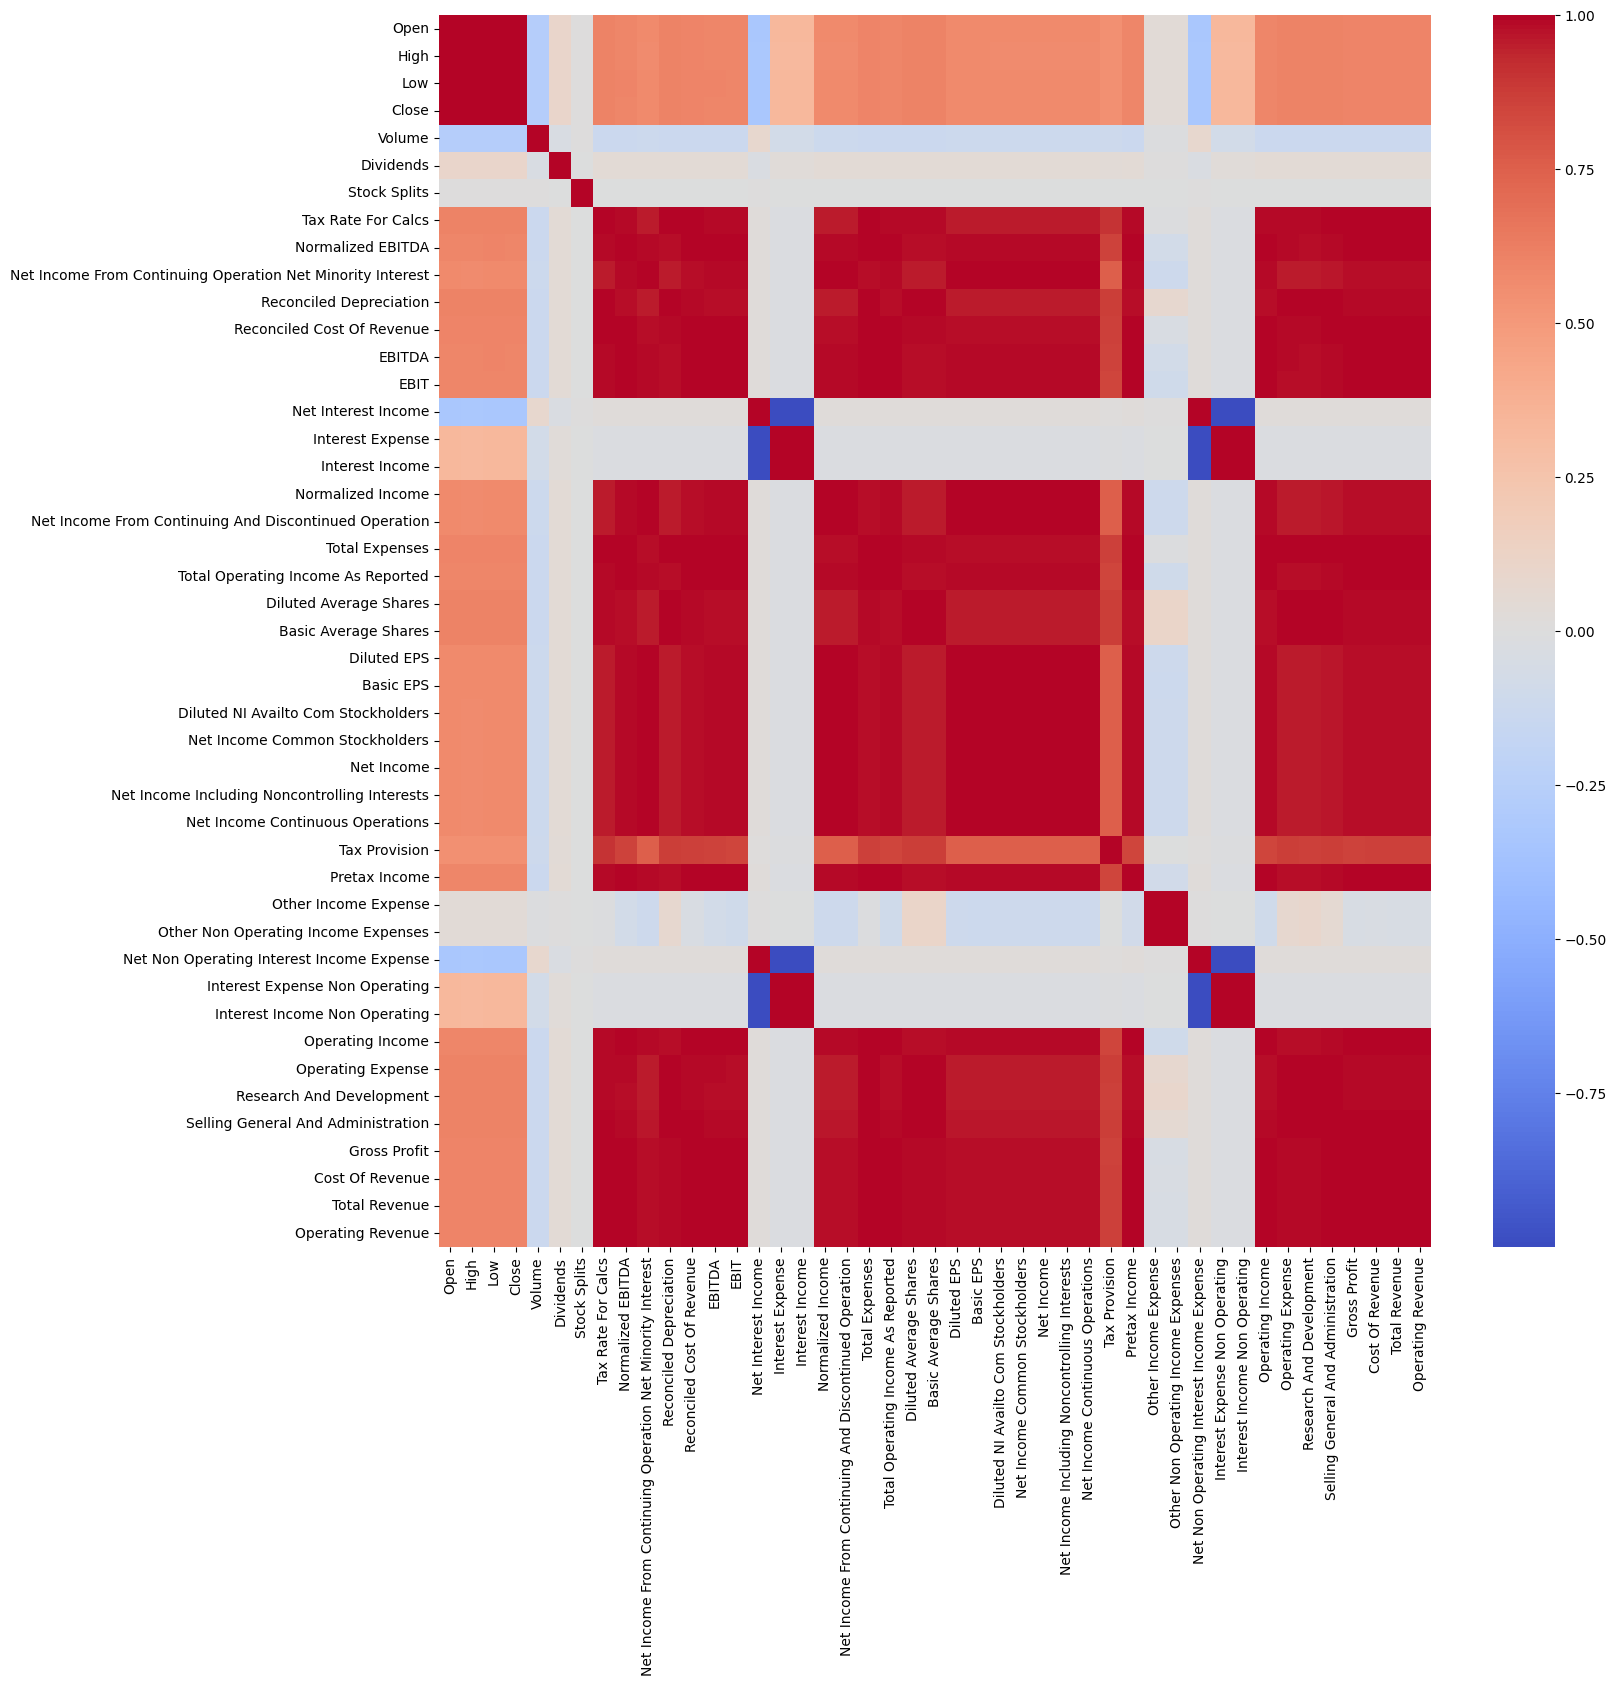

In [6]:
import matplotlib.pylab as plt
import seaborn as sns
plt.figure(figsize=(16, 16))
sns.heatmap(df.corr(), cmap='coolwarm')
plt.show()

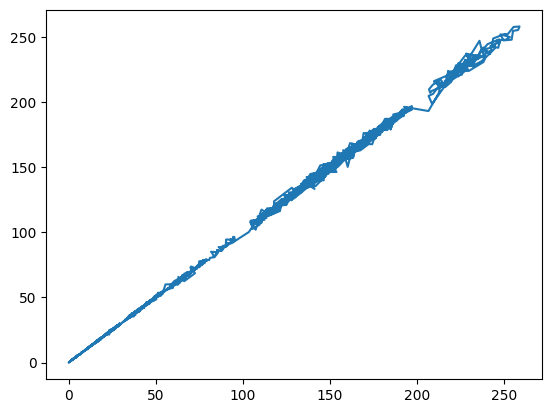

In [7]:
corr_matrix = df.corr()
plt.plot(df['Close'], df['Open'])

In [8]:
close_corr = corr_matrix['Close']

filtered_corr = close_corr[(close_corr >=-0.5) & (close_corr <=0.5)]
print(filtered_corr)

Volume                                      -0.269206
Dividends                                    0.095128
Stock Splits                                 0.004971
Net Interest Income                         -0.328167
Interest Expense                             0.328169
Interest Income                              0.328169
Other Income Expense                         0.036302
Other Non Operating Income Expenses          0.036302
Net Non Operating Interest Income Expense   -0.328167
Interest Expense Non Operating               0.328169
Interest Income Non Operating                0.328169
Name: Close, dtype: float64


<Axes: >

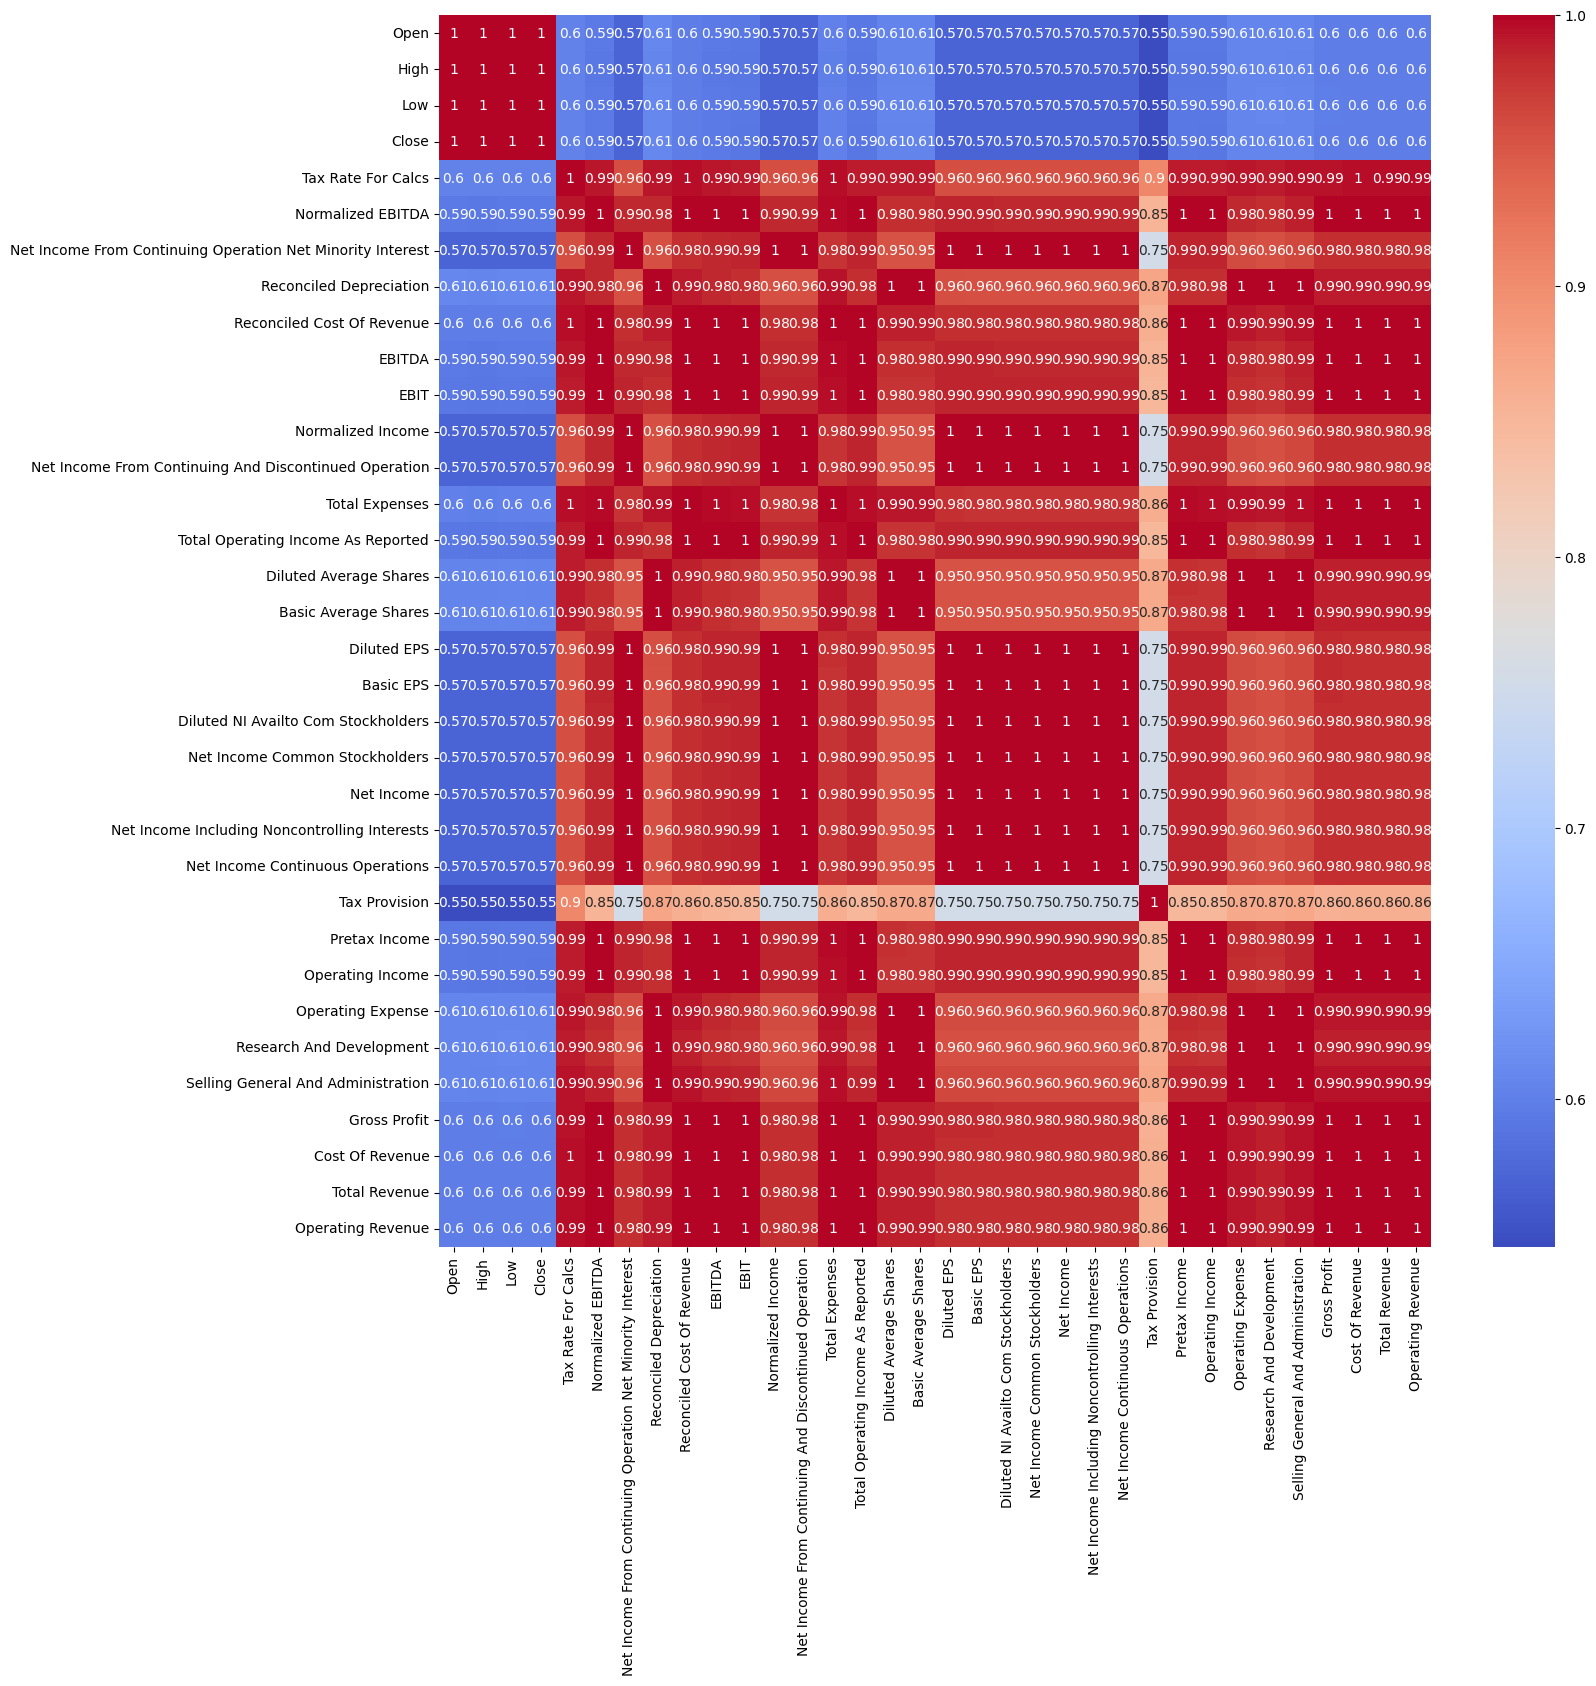

In [9]:
df = df.drop(columns = filtered_corr.index)
plt.figure(figsize=(16,16))
sns.heatmap(df.corr(),annot=True, cmap='coolwarm')

Code to visualize testing and prediction

In [10]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt


def show_plot(
    df, result_of_testing, days_to_train, predictions, days_in_future_to_predict
):
    df = df.tail(days_to_train)
    plt.figure(figsize=(10, 5))

    plt.plot(df.index, df["Close"], label="Real price", marker="o")
    dates_to_visualize_test = df.index[-days_in_future_to_predict:]

    plt.plot(
        dates_to_visualize_test,
        result_of_testing,
        label="result_of_testing",
        marker="o",
    )
    last_date = last_date = df.index[-1]
    future_dates = pd.date_range(
        last_date + pd.Timedelta(days=1), periods=days_in_future_to_predict, freq="B"
    )
    plt.plot(future_dates, predictions, label="Prediction", marker="o")
    plt.xlabel("Date")
    plt.ylabel("Stock price")
    plt.title("Stock price predition")
    plt.legend(
        title=f"Number of days to train: {days_to_train}\nNumber of days to predict: {days_in_future_to_predict}"
    )
    plt.show()


Model linear regression

In [11]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import sys


def predict_stock_prices(df_org, days_in_future_to_predict):
    int_max_value = int(sys.maxsize)
    max_size_df = df_org.shape[0]
    if max_size_df >1000:
        days_in_past_to_train = {i: int_max_value for i in range(max_size_df-days_in_future_to_predict, 1000, -1000)}
    if max_size_df>200:
        days_in_past_to_train.update({i: int_max_value for i in range(min(1000,max_size_df), 200, -50)})
    if max_size_df>50:
        days_in_past_to_train.update({i: int_max_value for i in range(min(200,max_size_df), 50, -10)})
    days_in_past_to_train.update({i: int_max_value for i in range(50, 10, -5)})
    model = LinearRegression()
    for days_to_train in days_in_past_to_train:
        if days_to_train > days_in_future_to_predict:

            df = df_org.tail(days_to_train + days_in_future_to_predict)
            X_train = np.array(range(0, days_to_train)).reshape(-1, 1)
            X_test = np.array(
                range(days_to_train, days_to_train + days_in_future_to_predict)
            ).reshape(-1, 1)
            y_train = df["Close"].iloc[0:days_to_train]
            y_test = df["Close"].iloc[
                days_to_train : days_to_train + days_in_future_to_predict
            ]

            model.fit(X_train, y_train)
            predictions = model.predict(X_test)
            mse = mean_squared_error(predictions, y_test)
            days_in_past_to_train[days_to_train] = mse

    days_to_train = min(days_in_past_to_train, key=lambda k: days_in_past_to_train[k])

    # to visualize result of training
    df = df_org.tail(days_to_train + days_in_future_to_predict)
    X_train = np.array(range(0, days_to_train)).reshape(-1, 1)
    X_test = np.array(
        range(days_to_train, days_to_train + days_in_future_to_predict)
    ).reshape(-1, 1)
    y_train = df["Close"].iloc[0:days_to_train]
    model.fit(X_train, y_train)
    result_of_testing_to_visualize = model.predict(X_test)
    # to predict in future

    df = df_org.tail(days_to_train)
    X_train = np.array(range(0, days_to_train)).reshape(-1, 1)
    y_train = df["Close"]
    model.fit(X_train, y_train)
    future_days = np.array(
        range(days_to_train, days_to_train + days_in_future_to_predict)
    ).reshape(-1, 1)
    result_of_predictions = model.predict(future_days)
    return result_of_testing_to_visualize, result_of_predictions, days_to_train


Now lets test if everythong works

C:\Users\konra\AppData\Local\Temp\ipykernel_19880\1239936064.py:42: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_stockdata = df_stockdata.fillna(0)


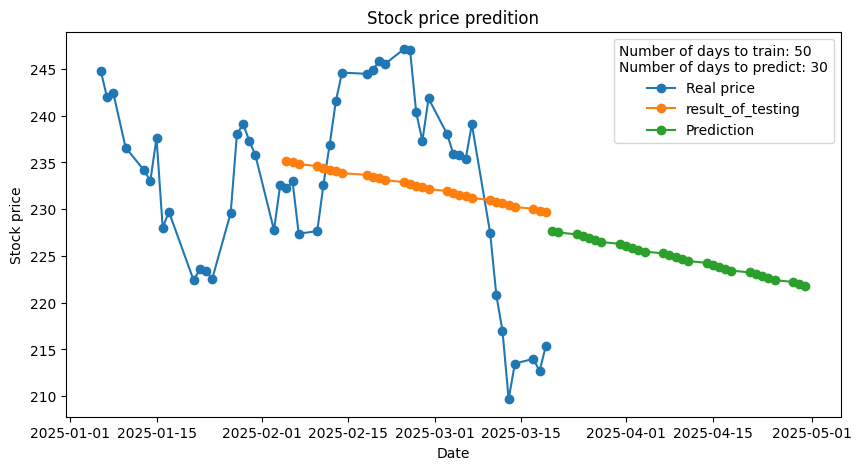

In [12]:
days_in_future_to_predict = 30  # user is giving this arg
symbol = "AAPL"  # user is giving this arg
df_stockdata = get_stock_data(symbol)

result_of_testing_to_visualize, result_of_predictions, best_days_to_train = (
    predict_stock_prices(df_stockdata, days_in_future_to_predict)
)


show_plot(
    df_stockdata,
    result_of_testing_to_visualize,
    best_days_to_train,
    result_of_predictions,
    days_in_future_to_predict,
)

Now i will focus in finding the best parameters in RandomForestRegressor model

In [34]:
def inverse_scaller(predictions, df_org, scaler):
    temp_array = np.zeros((predictions.shape[0], df_org.shape[1]))
    temp_array[:, df_org.columns.get_loc("Close")] = predictions.flatten()

    # Odwróć transformację
    predictions_original = scaler.inverse_transform(temp_array)

    # Wybierz tylko kolumnę 'Close'
    predictions_close = predictions_original[:, df_org.columns.get_loc("Close")]
    return predictions_close

In [14]:

def create_sequences(df, days_to_train, close_index):
    X = []
    y = []
    for i in range(days_to_train, len(df)):
        X.append(df[i - days_to_train : i])
        y.append(df[i, close_index])
    return np.array(X), np.array(y)




In [47]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout


def predict_stock_prices(df_org, days_in_future_to_predict):
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled_data = scaler.fit_transform(df_org)
    days_to_train = 60
    X, y = create_sequences(scaled_data, days_to_train, df_org.columns.get_loc("Close"))

    X_train, X_test = X[:-days_in_future_to_predict], X[days_in_future_to_predict:]
    y_train, y_test = y[:-days_in_future_to_predict], y[days_in_future_to_predict:]

    X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], df_org.shape[1]))
    X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], df_org.shape[1]))

        
    model = Sequential()

    # Pierwsza warstwa LSTM
    model.add(
        LSTM(
            units=50,
            return_sequences=True,
            input_shape=(X_train.shape[1], df_org.shape[1]),
        )
    )
    model.add(Dropout(0.2))

    # Druga warstwa LSTM
    model.add(LSTM(units=50, return_sequences=False))
    model.add(Dropout(0.2))

    # Warstwa wyjściowa
    model.add(Dense(units=1))

    # Kompilacja modelu
    model.compile(optimizer="adam", loss="mean_squared_error")

    # Podsumowanie modelu
    model.summary()
    history = model.fit(
        X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test)
    )
    predictions = model.predict(X_test)

    predictions = inverse_scaller(predictions, df_org, scaler)

    y_test_original = inverse_scaller(y_test, df_org, scaler)
    future_predictions = []
    last_sequence = X_test[-1]
    for _ in range(30):
        pred = model.predict(last_sequence.reshape(1, days_to_train, df_org.shape[1]))
        future_predictions.append(pred[0, 0])
        # Aktualizuj sekwencję
        last_sequence = np.roll(last_sequence, -1, axis=0)  # Przesuń sekwencję wzdłuż osi czasu
        last_sequence[-1, df_org.columns.get_loc("Close")] = pred[0, 0]  # Zastąp 'Close' przewidywa





    # Skalowanie przewidywań z powrotem do oryginalnych wartości
    future_predictions = np.array(future_predictions).reshape(-1, 1)
    future_predictions = inverse_scaller(future_predictions, df_org, scaler)
    
    # print(predictions.shape)
    # print(future_predictions.shape)
    # print("--------------")
    # print(predictions)
    # print("--------------")
    # print(future_predictions)
    show_plot(df_org, predictions[-days_in_future_to_predict:] ,60,future_predictions,days_in_future_to_predict)
    



C:\Users\konra\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_32 (LSTM)                  │ (None, 60, 50)         │        19,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_32 (Dropout)            │ (None, 60, 50)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_33 (LSTM)                  │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_33 (Dropout)            │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 39,451 (154.11 KB)

 Trainable params: 39,451 (154.11 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
346/346 ━━━━━━━━━━━━━━━━━━━━ 14s 33ms/step - loss: 0.0063 - val_loss: 4.6924e-04
Epoch 2/50
346/346 ━━━━━━━━━━━━━━━━━━━━ 11s 32ms/step - loss: 9.0035e-04 - val_loss: 1.5831e-04
Epoch 3/50
346/346 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - loss: 5.9851e-04 - val_loss: 1.8675e-04
Epoch 4/50
346/346 ━━━━━━━━━━━━━━━━━━━━ 12s 34ms/step - loss: 6.9059e-04 - val_loss: 3.1168e-04
Epoch 5/50
346/346 ━━━━━━━━━━━━━━━━━━━━ 12s 34ms/step - loss: 4.8744e-04 - val_loss: 3.0076e-04
Epoch 6/50
346/346 ━━━━━━━━━━━━━━━━━━━━ 12s 34ms/step - loss: 4.8894e-04 - val_loss: 1.4385e-04
Epoch 7/50
346/346 ━━━━━━━━━━━━━━━━━━━━ 12s 34ms/step - loss: 4.2097e-04 - val_loss: 2.1889e-04
Epoch 8/50
346/346 ━━━━━━━━━━━━━━━━━━━━ 12s 34ms/step - loss: 4.3206e-04 - val_loss: 1.4032e-04
Epoch 9/50
346/346 ━━━━━━━━━━━━━━━━━━━━ 12s 34ms/step - loss: 3.6042e-04 - val_loss: 1.4190e-04
Epoch 10/50
346/346 ━━━━━━━━━━━━━━━━━━━━ 12s 36ms/step - loss: 4.2670e-04 - val_loss: 9.0169e-05
Epoch 11/50
346/346 ━━━━━━━━━━━━━━━━━━━━ 13

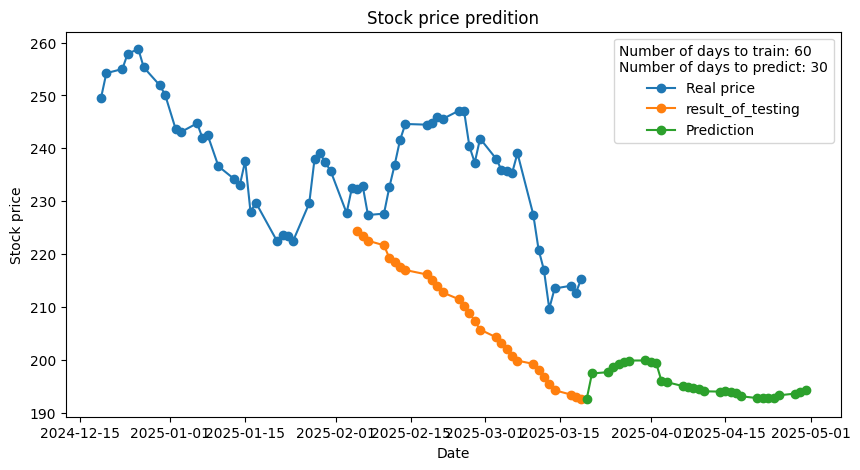

TypeError: cannot unpack non-iterable NoneType object

In [48]:
result_of_testing_to_visualize, result_of_predictions, best_days_to_train = (
    predict_stock_prices(df_stockdata, days_in_future_to_predict)
)